In [1]:
%load_ext autoreload
%autoreload 2
import theano
theano.config.mode = 'FAST_COMPILE'

from keras import backend as K
K.image_dim_ordering()

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5103)
/home/micha/projects/orioles/keras_mnist/venv/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


'th'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn import ensemble, metrics, model_selection
from sklearn.datasets import load_digits, fetch_mldata

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Reshape, Convolution2D, Flatten, MaxPooling2D
from keras.utils import np_utils

from plot_utils import plot_digit, plot_confusion_matrix, plot_train_history, plot_activations
import pretrained

In [3]:
n_samples = 25000

digits = fetch_mldata('MNIST original', data_home='./data/', )
digits.data = digits.data.astype('float32') / 255


X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data,
                                                                    digits.target.astype('uint8'),
                                                                    test_size=0.33)

In [4]:
# Create a classifier: a support vector classifier
classifier = ensemble.RandomForestClassifier(n_estimators=10,n_jobs=2)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2263
          1       0.97      0.98      0.98      2565
          2       0.92      0.95      0.94      2268
          3       0.91      0.93      0.92      2392
          4       0.94      0.93      0.94      2324
          5       0.93      0.92      0.92      2050
          6       0.96      0.96      0.96      2291
          7       0.96      0.95      0.95      2387
          8       0.94      0.90      0.92      2280
          9       0.93      0.91      0.92      

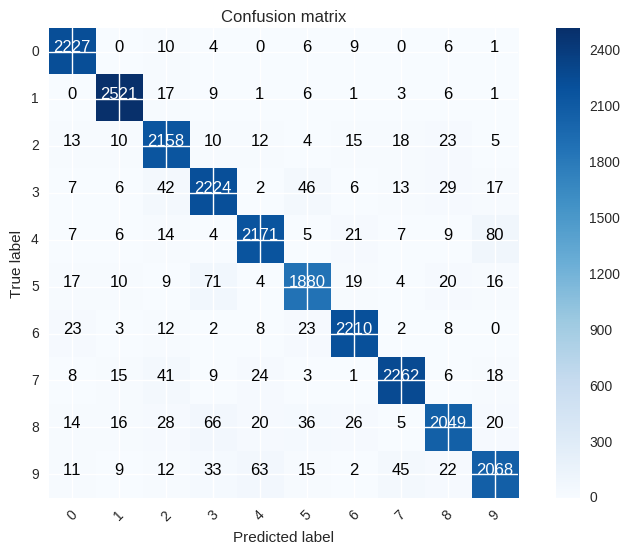

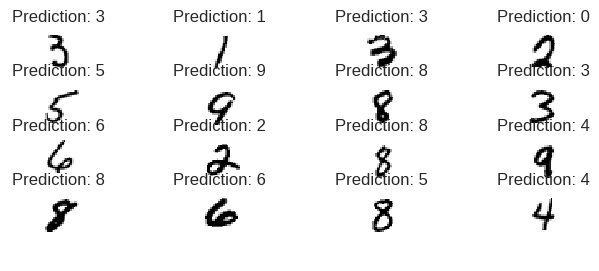

In [5]:
# Now predict the value of the digit on the second half:
y_test_predicted_rf = classifier.predict(X_test)
rf_accuracy = (y_test == y_test_predicted_rf).sum() / y_test.shape[0]

print("Classification report for classifier {}:\n{}\n".format(
    classifier,
    metrics.classification_report(y_test, y_test_predicted_rf)
))

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_predicted_rf),
                      list(range(10)))

plot_digit(X_test, y_test_predicted_rf)

In [6]:
nb_classes = 10

@pretrained.pretrained
def create_model_dense():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=X_train.shape[1:], name='dense1'))
    model.add(Dropout(0.25, name='dropout'))
    model.add(Dense(nb_classes, activation='softmax', name='dense2'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    return model

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model_dense = create_model_dense()
history_dense = model_dense.fit(X_train, Y_train, batch_size=128, verbose=2,
                                nb_epoch=1000, # set nb_epoch to be huge so EarlyStopping can decide when we stop
                                validation_data=(X_test, Y_test),
                                callbacks=[EarlyStopping(patience=2)])

Train on 46900 samples, validate on 23100 samples
Epoch 1/1000
0s - loss: 0.6490 - acc: 0.8214 - val_loss: 0.3297 - val_acc: 0.9088
Epoch 2/1000
0s - loss: 0.3183 - acc: 0.9100 - val_loss: 0.2595 - val_acc: 0.9272
Epoch 3/1000
0s - loss: 0.2599 - acc: 0.9262 - val_loss: 0.2241 - val_acc: 0.9362
Epoch 4/1000
0s - loss: 0.2261 - acc: 0.9354 - val_loss: 0.1973 - val_acc: 0.9437
Epoch 5/1000
0s - loss: 0.2022 - acc: 0.9430 - val_loss: 0.1795 - val_acc: 0.9486
Epoch 6/1000
0s - loss: 0.1840 - acc: 0.9473 - val_loss: 0.1661 - val_acc: 0.9513
Epoch 7/1000
0s - loss: 0.1692 - acc: 0.9523 - val_loss: 0.1543 - val_acc: 0.9550
Epoch 8/1000
0s - loss: 0.1578 - acc: 0.9546 - val_loss: 0.1467 - val_acc: 0.9569
Epoch 9/1000
0s - loss: 0.1489 - acc: 0.9567 - val_loss: 0.1395 - val_acc: 0.9594
Epoch 10/1000
0s - loss: 0.1397 - acc: 0.9606 - val_loss: 0.1326 - val_acc: 0.9610
Epoch 11/1000
0s - loss: 0.1317 - acc: 0.9622 - val_loss: 0.1264 - val_acc: 0.9632
Epoch 12/1000
0s - loss: 0.1257 - acc: 0.9637 

Classification report for classifier <keras.models.Sequential object at 0x7f3c60927400>:
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2263
          1       0.98      0.99      0.99      2565
          2       0.97      0.98      0.97      2268
          3       0.97      0.97      0.97      2392
          4       0.98      0.97      0.98      2324
          5       0.97      0.97      0.97      2050
          6       0.98      0.98      0.98      2291
          7       0.98      0.98      0.98      2387
          8       0.98      0.97      0.97      2280
          9       0.97      0.97      0.97      2280

avg / total       0.98      0.98      0.98     23100


Number of parameters in model: 101770


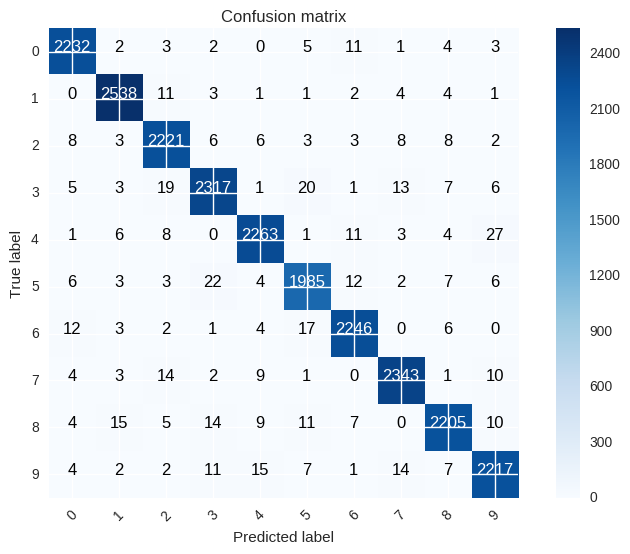

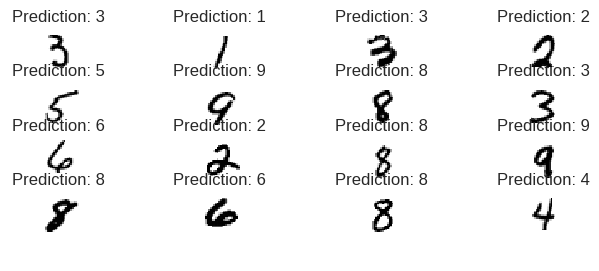

In [7]:
# Now predict the value of the digit on the second half:
y_test_predicted_dense = model_dense.predict_classes(X_test, verbose=0)

print("Classification report for classifier %s:\n%s\n"
      % (model_dense, metrics.classification_report(y_test, y_test_predicted_dense)))

print("Number of parameters in model: {}".format(model_dense.count_params()))


plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_predicted_dense),
                      list(range(10)))

plot_digit(X_test, y_test_predicted_dense)

In [9]:
nb_classes = 10

@pretrained.pretrained
def create_model_conv():
    model = Sequential()
    model.add(Reshape((1, 28,28), input_shape=X_train.shape[1:], name='reshape'))
    model.add(Convolution2D(16, 3, 3, activation='relu', name='conv2d1'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool1'))
    model.add(Convolution2D(16, 3, 3, activation='relu', name='conv2d2'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(64, activation='relu', name='dense1'))
    model.add(Dropout(0.25, name='dropout'))
    model.add(Dense(nb_classes, activation='softmax', name='output'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    return model

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model_conv = create_model_conv()
history_conv = model_conv.fit(X_train, Y_train, batch_size=128, verbose=2,
                              nb_epoch=1000, # set nb_epoch to be huge so EarlyStopping can decide when we stop
                              validation_data=(X_test, Y_test),
                              callbacks=[EarlyStopping(patience=2)])

Train on 46900 samples, validate on 23100 samples
Epoch 1/1000
2s - loss: 0.6273 - acc: 0.8036 - val_loss: 0.1906 - val_acc: 0.9445
Epoch 2/1000
1s - loss: 0.1959 - acc: 0.9415 - val_loss: 0.1281 - val_acc: 0.9609
Epoch 3/1000
1s - loss: 0.1572 - acc: 0.9529 - val_loss: 0.1089 - val_acc: 0.9655
Epoch 4/1000
2s - loss: 0.1352 - acc: 0.9583 - val_loss: 0.0970 - val_acc: 0.9701
Epoch 5/1000
1s - loss: 0.1207 - acc: 0.9629 - val_loss: 0.0877 - val_acc: 0.9732
Epoch 6/1000
1s - loss: 0.1094 - acc: 0.9667 - val_loss: 0.0865 - val_acc: 0.9727
Epoch 7/1000
1s - loss: 0.0986 - acc: 0.9703 - val_loss: 0.0761 - val_acc: 0.9762
Epoch 8/1000
1s - loss: 0.0912 - acc: 0.9727 - val_loss: 0.0730 - val_acc: 0.9778
Epoch 9/1000
1s - loss: 0.0870 - acc: 0.9733 - val_loss: 0.0729 - val_acc: 0.9764
Epoch 10/1000
2s - loss: 0.0816 - acc: 0.9748 - val_loss: 0.0644 - val_acc: 0.9803
Epoch 11/1000
1s - loss: 0.0763 - acc: 0.9765 - val_loss: 0.0629 - val_acc: 0.9798
Epoch 12/1000
1s - loss: 0.0766 - acc: 0.9764 

Classification report for classifier <keras.models.Sequential object at 0x7f3c62cf3d30>:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2263
          1       0.99      0.99      0.99      2565
          2       0.98      0.99      0.98      2268
          3       0.99      0.97      0.98      2392
          4       0.99      0.99      0.99      2324
          5       0.98      0.98      0.98      2050
          6       0.99      0.99      0.99      2291
          7       0.98      0.99      0.98      2387
          8       0.98      0.98      0.98      2280
          9       0.98      0.97      0.98      2280

avg / total       0.98      0.98      0.98     23100


Number of parameters in model: 28794


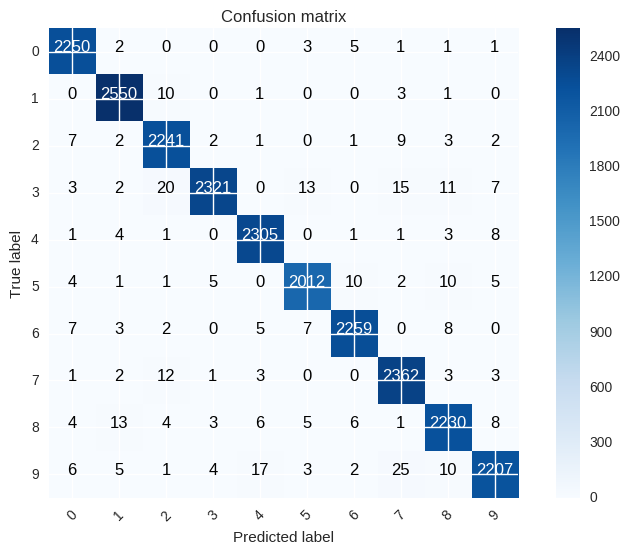

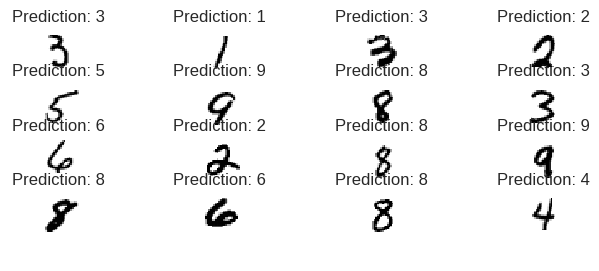

In [10]:
# Now predict the value of the digit on the second half:
y_test_predicted_conv = model_conv.predict_classes(X_test, verbose=0)

print("Classification report for classifier %s:\n%s\n"
      % (model_conv, metrics.classification_report(y_test, y_test_predicted_conv)))

print("Number of parameters in model: {}".format(model_conv.count_params()))

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_predicted_conv),
                      list(range(10)))

plot_digit(X_test, y_test_predicted_conv)

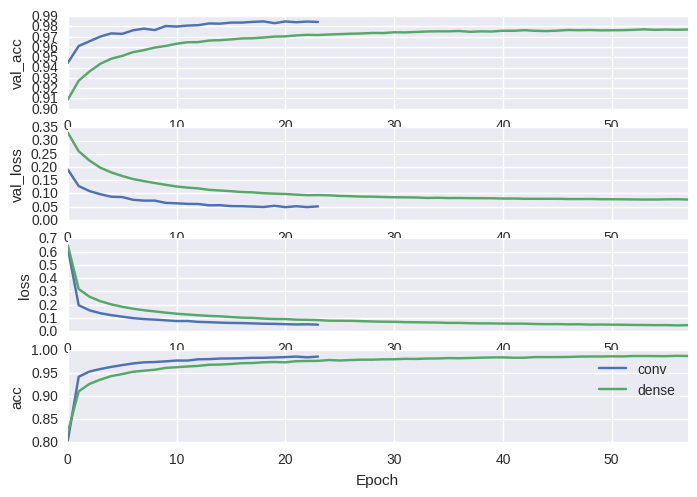

In [11]:
ax = plot_train_history({"dense": history_dense, "conv": history_conv})

In [12]:
model_dense.summary()
model_conv.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense1 (Dense)                   (None, 128)           100480      dense_input_1[0][0]              
____________________________________________________________________________________________________
dropout (Dropout)                (None, 128)           0           dense1[0][0]                     
____________________________________________________________________________________________________
dense2 (Dense)                   (None, 10)            1290        dropout[0][0]                    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Layer (type)       

[(1, 1, 28, 28), (1, 16, 26, 26), (1, 16, 13, 13), (1, 16, 11, 11), (1, 16, 5, 5), (1, 400), (1, 64), (1, 64), (1, 10)]


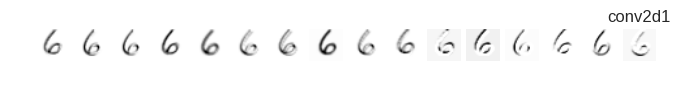

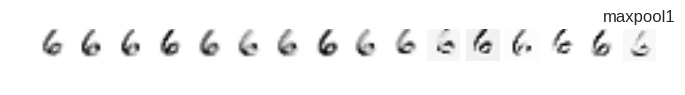

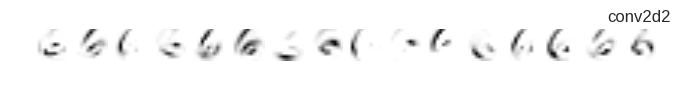

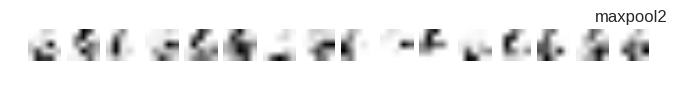

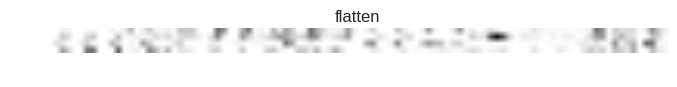

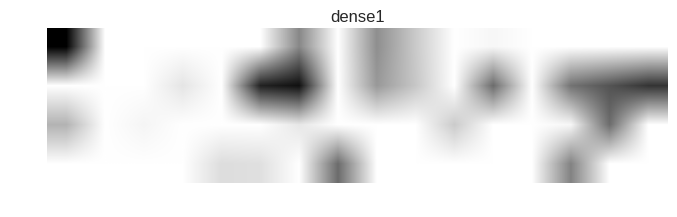

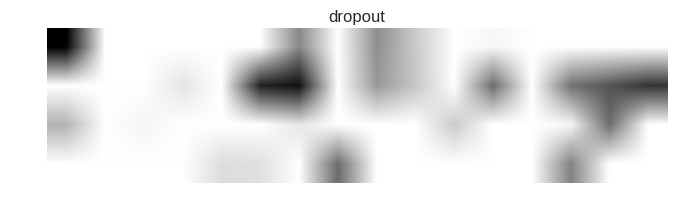

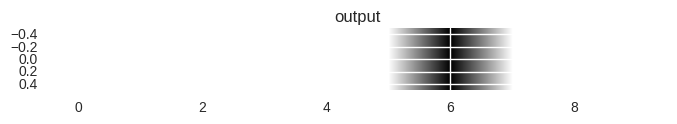

In [13]:
plot_activations(model_conv, random.choice(X_test))